<a href="https://colab.research.google.com/github/aarishlakhani/Machine-Learning/blob/main/Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Classification with Logistic Regression

## Instructions

* Complete the assignment as outlined below.
* Restart your kernel and rerun your cells before submission.
* Submit your completed notebook (.ipynb).

## Dataset Information

The dataset contains health-related data for predicting diabetes. Below are the features:

* `Pregnancies`: Number of pregnancies
* `Glucose`: Plasma glucose concentration
* `BloodPressure`: Diastolic blood pressure (mm Hg)
* `SkinThickness`: Triceps skin fold thickness (mm)
* `Insulin`: 2-hour serum insulin (mu U/ml)
* `BMI`: Body mass index
* `DiabetesPedigreeFunction`: Diabetes pedigree function
* `Age`: Age (years)
* `Outcome`: Target variable (1 = Diabetes, 0 = No Diabetes)

Your goal in this homework is to train a first model for predicting the probability that a patient has diabetes given their healthcare data.

In [49]:
# Suggested packages, you can add more if you think they are necessary.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
# Download the data. Uncomment if using Colab.
!gdown https://drive.google.com/uc?id=1-_YcEl0q5LsDXRq5eix9K4gjSq78Ffd5

Downloading...
From: https://drive.google.com/uc?id=1-_YcEl0q5LsDXRq5eix9K4gjSq78Ffd5
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 52.2MB/s]


## Question 1:

1. Load the dataset `diabetes.csv` and display the first 5 rows.
2. Print out all columns in the dataset and identify any missing values.
3. Show the descriptive statistics of the data.

In [51]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

#Print the first 5 rows of the dataframe.
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [52]:
# Report number of null values
#Print out all columns in the dataset
print("\nColumns in the Dataset:")
print(df.columns.tolist())

# Identify missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Columns in the Dataset:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing Values in Each Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [53]:
# Show descriptive statistics
print("\nDescriptive Statistics of the Dataset:")
print(df.describe())


Descriptive Statistics of the Dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.4769

## Question 2:

What is the baseline accuracy for this classification problem? Baseline accuracy is the accuracy of always predicting the most common class. You can assume there are no outliers in the data.

In [54]:
# Question 2 code
# Calculate the baseline accuracy
most_common_class = df["Outcome"].value_counts().idxmax()  # Most frequent class (0 or 1)
baseline_accuracy = df["Outcome"].value_counts().max() / len(df)  # Proportion of most common class

# Print the baseline accuracy
print(f"Baseline Accuracy: {baseline_accuracy:.2%}")



Baseline Accuracy: 65.10%


## Question 3:

Split the data into training and testing sets. Use 70% of the data for training and 30% for testing. Pass `random_state = 42` to `train_test_split`. Ensure the `Outcome` column is the response variable. Report the descriptive statistics of X_train and X_test.

In [55]:
# Question 3 code

# Define features (X) and target variable (y)
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target variable

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Compute descriptive statistics for X_train and X_test
print("Descriptive Statistics of X_train:")
print(X_train.describe())

print("\nDescriptive Statistics of X_test:")
print(X_test.describe())

Descriptive Statistics of X_train:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   537.000000  537.000000     537.000000     537.000000  537.000000   
mean      3.882682  120.910615      69.143389      20.407821   78.467412   
std       3.350097   31.293320      19.048346      15.511291  108.722892   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   38.000000   
75%       6.000000  141.000000      80.000000      32.000000  130.000000   
max      17.000000  198.000000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  537.000000                537.000000  537.000000  
mean    32.134637                  0.480529   33.551210  
std      7.806806                  0.335253   11.794639  
min      0.000000                  0.084000   21

**Written question: Are the descriptive statistics of the X_train and X_test datasets similar? Is this a reasonable dataset for the problem?**<br>
Yes, the descriptive statistics of X_train and X_test are quite similar. The mean, standard deviation, minimum, and maximum values across different features do not show significant variation between the two datasets. This indicates that the data split was performed properly, preserving the overall distribution of features.

Yes, this dataset is reasonable for the classification problem because:

-Feature Distribution: The distributions of features in X_train and X_test are consistent, meaning the training data represents the test data well.<br>
-Stratified Split: The target variable (Outcome) was stratified during splitting, ensuring that both sets maintain the same proportion of diabetic and non-diabetic cases.

**Written answer:**

## Question 4:

1. Create a pipeline that first standardizes the data using a z-scale transform, and then trains an instance of `LogisticRegression` with `penalty = None` and `max_iter = 1000`. Use the same random seed you used before.
2. Train the pipeline using the training set.

In [56]:
# Question 4 code
# Create a pipeline that scales the features and trains a logistic regression model
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features using z-score transformation
    ("logistic_regression", LogisticRegression(penalty=None, max_iter=1000, random_state=42))  # Logistic Regression Model, Changed penalty to None
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Model is now successfully trained
print("Pipeline training complete.")

Pipeline training complete.


## Question 5:

1. Compute the model’s accuracy on the training and testing sets.
2. Display the model’s coefficients and intercept.

In [57]:
# Display coefficients
# Get the training parameters in a dataframe with the corresponding feature names
coefficients = pipeline.named_steps["logistic_regression"].coef_[0]
feature_names = X_train.columns
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Display the coefficients DataFrame
print("\nModel Coefficients:")
print(coefficients_df)

# Get the intercept of the logistic regression model
intercept = pipeline.named_steps["logistic_regression"].intercept_[0]
print(f"\nIntercept: {intercept:.4f}")



Model Coefficients:
                    Feature  Coefficient
0               Pregnancies     0.467247
1                   Glucose     1.146764
2             BloodPressure    -0.209568
3             SkinThickness    -0.038552
4                   Insulin    -0.084794
5                       BMI     0.726851
6  DiabetesPedigreeFunction     0.238345
7                       Age     0.091269

Intercept: -0.8797


In [58]:
# Calculate accuracy
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Testing Accuracy: {test_accuracy:.2%}")

Training Accuracy: 78.96%
Testing Accuracy: 74.46%


## Question 6:

1. Plot the ROC curve for the logistic regression model using the testing set. Make sure your plot includes a title and properly labeled axes.
2. Compute the area under the curve (AUC). Report the AUC at the top-left of your plot.

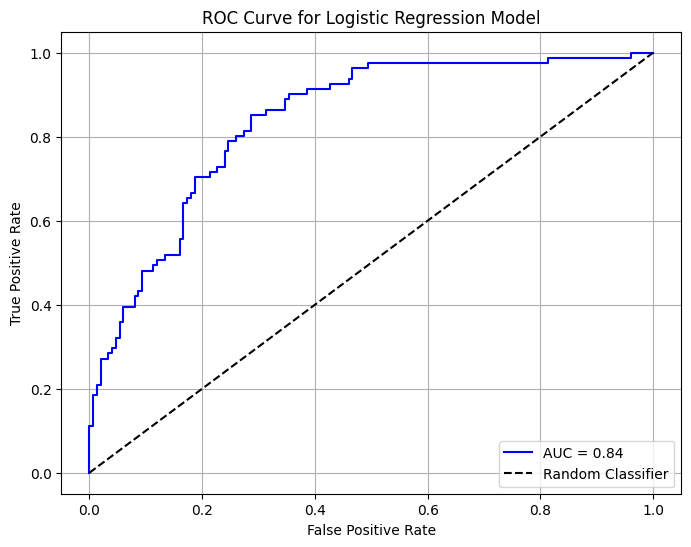

In [59]:
# Compute probabilities
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")  # Diagonal reference line
plt.title("ROC Curve for Logistic Regression Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Written question: Comment on the capacity of the model to predict the outcome. Is the AUC acceptable?**

**Written answer:**<br>
The model's AUC of 0.84 indicates strong discriminative ability, suggesting that it is highly capable of distinguishing between diabetic and non-diabetic cases. An AUC value above 0.80 is generally considered excellent, highlighting the model's effectiveness in predicting outcomes. This means the model performs significantly better than random guessing and has a robust capacity to predict the target variable. The AUC score is acceptable and demonstrates that the logistic regression model is well-suited for this classification task. While the performance is strong, there may still be room for improvement through further feature engineering or hyperparameter optimization.











